In [66]:
import os

import click
from os.path import  join, isdir
from plan import Plan
from action import Action
from utils import load_from_folder
from multiprocess import Pool


In [67]:
logger_dir = './logs/'
data_base_dir = '../datasets/'
domain = 'satellite'
source_dir = f"{join(data_base_dir, domain)}/optimal_plans/plans_max-plan-dim=30_train_percentage=0.8" 
print('Domain dir:', source_dir)
os.makedirs(logger_dir, exist_ok=True)
test = True

Domain dir: ../datasets/satellite/optimal_plans/plans_max-plan-dim=30_train_percentage=0.8


Data load

In [68]:
splits = {}
train_plans = load_from_folder(source_dir,["train_plans"])
train_plans = train_plans[0]
val_plans = load_from_folder(source_dir,["val_plans"])
val_plans = val_plans[0]
test_plans = load_from_folder(source_dir,["test_plans"])
test_plans = test_plans[0]

splits["train_plans"] = train_plans
splits["val_plans"] = val_plans
splits["test_plans"] = test_plans


train_plans loaded from ../datasets/satellite/optimal_plans/plans_max-plan-dim=30_train_percentage=0.8
val_plans loaded from ../datasets/satellite/optimal_plans/plans_max-plan-dim=30_train_percentage=0.8
test_plans loaded from ../datasets/satellite/optimal_plans/plans_max-plan-dim=30_train_percentage=0.8


Data analysis

In [69]:
print(f"Train plans: {len(train_plans)}")
print(f"Val plans: {len(val_plans)}")
print(f"Test plans: {len(test_plans)}")

Train plans: 50236
Val plans: 6279
Test plans: 6281


In [70]:
for split in splits:
    print(f"{split}: Number of plans: {len(splits[split])}")        

train_plans: Number of plans: 50236
val_plans: Number of plans: 6279
test_plans: Number of plans: 6281


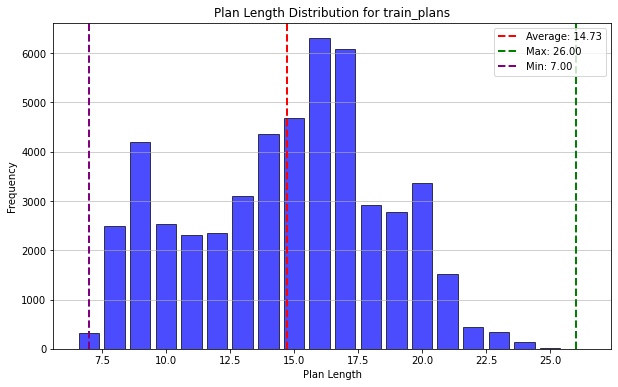

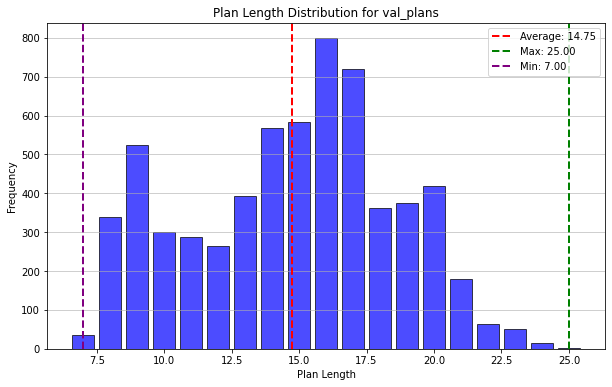

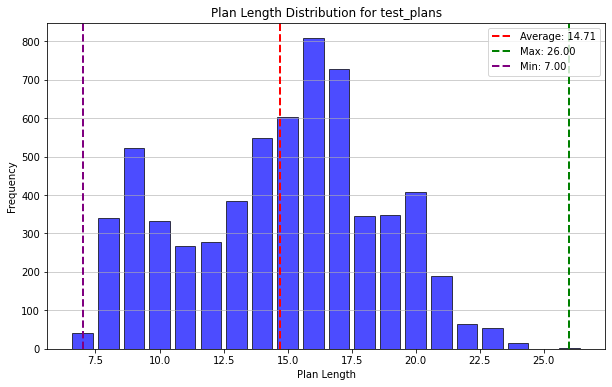

In [71]:
import numpy as np
import matplotlib.pyplot as plt

for split, plans in splits.items():
    plan_lengths = [len(plan.actions) for plan in plans]
   
    avg_length_local = np.mean(plan_lengths)
    max_length_local = np.max(plan_lengths)
    min_length_local = np.min(plan_lengths)

    frequency = {}
    for length in plan_lengths:
        frequency[length] = frequency.get(length, 0) + 1
    plt.figure(figsize=(10, 6))
    plt.bar(frequency.keys(), frequency.values(), color='blue', alpha=0.7, edgecolor='black')
    plt.axvline(x=avg_length_local, color='red', linestyle='--', linewidth=2, label=f'Average: {avg_length_local:.2f}')
    plt.axvline(x=max_length_local, color='green', linestyle='--', linewidth=2, label=f'Max: {max_length_local:.2f}')
    plt.axvline(x=min_length_local, color='purple', linestyle='--', linewidth=2, label=f'Min: {min_length_local:.2f}')
    plt.legend()
    plt.title(f"Plan Length Distribution for {split}")
    plt.xlabel("Plan Length")
    plt.ylabel("Frequency")
    plt.grid(axis='y', alpha=0.75)
    plt.show()

In [72]:
for split, plans in splits.items():
    print(f"Plan {plans[0].plan_name} for {split}:")
    for action in plans[0].actions:
        print(f"    {action.name}")
        print(f"        + : {action.positiveEffects}")
        print(f"        - : {action.negativeEffects}")
    print()

Plan /data/users/mchiari/WMCA/datasets/satellite/optimal_plans/xmls//xml-LPG-p013158.SOL for train_plans:
    SWITCH_ON INSTRUMENT1 SATELLITE3
        + : ['power_on instrument1']
        - : ['calibrated instrument1', 'power_avail satellite3']
    SWITCH_ON INSTRUMENT7 SATELLITE0
        + : ['power_on instrument7']
        - : ['calibrated instrument7', 'power_avail satellite0']
    TURN_TO SATELLITE4 STAR12 GROUNDSTATION1
        + : ['pointing satellite4 star12']
        - : ['pointing satellite4 groundstation1']
    TURN_TO SATELLITE3 PLANET10 PLANET9
        + : ['pointing satellite3 planet10']
        - : ['pointing satellite3 planet9']
    CALIBRATE SATELLITE3 INSTRUMENT1 PLANET10
        + : ['calibrated instrument1']
        - : []
    TURN_TO SATELLITE0 STAR0 PLANET8
        + : ['pointing satellite0 star0']
        - : ['pointing satellite0 planet8']
    CALIBRATE SATELLITE0 INSTRUMENT7 STAR0
        + : ['calibrated instrument7']
        - : []
    TURN_TO SATELLITE0 PHENO

In [73]:
for split, plans in splits.items():
    for plan in plans[:3]:
        print(f"Plan {plan.goals}:")
        print()

Plan ['have_image phenomenon8 spectrograph0', 'have_image star12 infrared3', 'have_image star0 infrared0', 'have_image phenomenon4 image4', 'have_image planet10 infrared3', 'have_image star5 spectrograph0', 'pointing satellite3 planet10', 'pointing satellite4 star12', 'pointing satellite0 groundstation1']:

Plan ['have_image star16 spectrograph1', 'have_image planet4 image3', 'have_image planet12 spectrograph1', 'have_image star5 image3', 'have_image star7 image4', 'pointing satellite1 star15', 'pointing satellite2 phenomenon8']:

Plan ['have_image phenomenon6 spectrograph2', 'have_image star9 image2', 'have_image phenomenon5 spectrograph2', 'have_image phenomenon4 image2', 'have_image star12 image3', 'pointing satellite0 phenomenon14', 'pointing satellite2 star2']:

Plan ['have_image star5 image2', 'have_image star1 infrared3', 'have_image groundstation0 image2', 'have_image star2 image2', 'have_image star3 infrared3', 'pointing satellite2 groundstation0', 'pointing satellite0 phenome

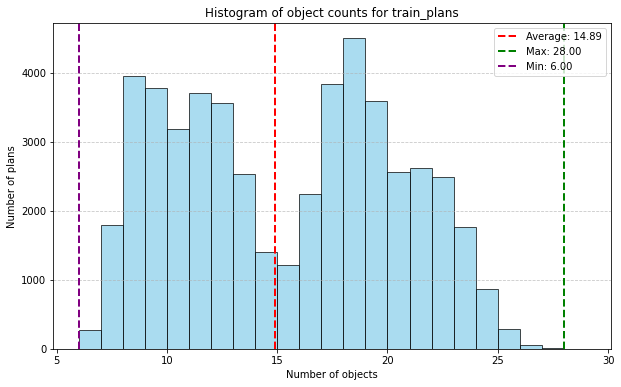

train_plans has 50236 plans with an average of 14.89 objects.


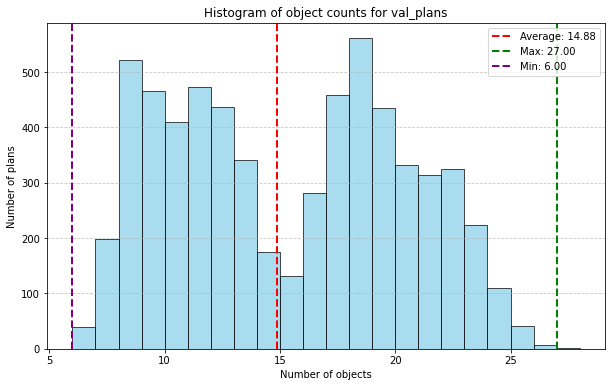

val_plans has 6279 plans with an average of 14.88 objects.


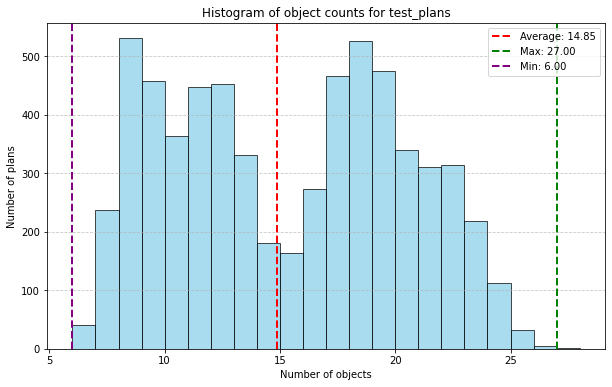

test_plans has 6281 plans with an average of 14.85 objects.


In [78]:
# counting plan init objects,
# how can i know all objects in the domain without the domain?
# try to explore the plan to find all objects involved
def plot_obj_histogram(obj_numbers_list, split):
    avg_length_local = np.mean(obj_numbers_list)
    max_length_local = np.max(obj_numbers_list)
    min_length_local = np.min(obj_numbers_list)
    plt.figure(figsize=(10, 6))
    bins = range(min(obj_numbers_list), max(obj_numbers_list) + 2)
    plt.hist(obj_numbers_list, bins=bins, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(x=avg_length_local, color='red', linestyle='--', linewidth=2, label=f'Average: {avg_length_local:.2f}')
    plt.axvline(x=max_length_local, color='green', linestyle='--', linewidth=2, label=f'Max: {max_length_local:.2f}')
    plt.axvline(x=min_length_local, color='purple', linestyle='--', linewidth=2, label=f'Min: {min_length_local:.2f}')
    plt.title(f"Histogram of object counts for {split}")
    plt.xlabel("Number of objects")
    plt.ylabel("Number of plans")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    
for split, plans in splits.items():
    obj_numbers_list = []
    for plan in plans:
        obj_set = set()
        for text in plan.initial_state:
            for obj in text.split(" ")[1:]: # skips predicate name and cycles objects
                obj_set.add(obj)
        for action in plan.actions:
            #print(action.positiveEffects)
            for fluent in action.positiveEffects:
                #print(f"    {fluent}")
                for obj in fluent.split(" ")[1:]:
                    #print(f"    {obj}")
                    obj_set.add(obj)
            for fluent in action.negativeEffects:
                #print(f"    {fluent}")
                for obj in fluent.split(" ")[1:]:
                    #print(f"    {obj}")
                    obj_set.add(obj)
            # for fluent in action.precondition:
            #     #print(f"    {fluent}")
            #     for obj in fluent.split(" ")[1:]:
            #         #print(f"    {obj}")
            #         obj_set.add(obj)
        # print (f"Plan {plan.plan_name} has {len(obj_set)} objects.")
        obj_numbers_list.append(len(obj_set))
    
    plot_obj_histogram(obj_numbers_list, split)
    print(f"{split} has {len(obj_numbers_list)} plans with an average of {round(np.mean(obj_numbers_list),2)} objects.")